In [1]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [4]:
df_train = pd.read_csv("mnist_train.csv")

In [5]:
df_test = pd.read_csv("mnist_test.csv")

In [6]:
X_train = df_train.drop(columns=['label'])
y_train = df_train[['label']]

In [7]:
X_test = df_test.drop(columns=['label'])
y_test = df_test[['label']]

In [8]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logistic_params = [
    {"max_iter": 5, "solver": "lbfgs"},
    {"max_iter": 7, "solver": "saga"},
    {"max_iter": 10, "solver": "lbfgs"}
]

In [11]:
best_logistic_model = None
best_logistic_accuracy = 0
best_logistic_params = None

In [12]:
for params in logistic_params:
    log_reg = LogisticRegression(**params, multi_class='multinomial')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_logistic_accuracy:
        best_logistic_accuracy = accuracy
        best_logistic_params = params
        best_logistic_model = log_reg
        best_y_pred_logistic = y_pred

Testing {'max_iter': 5, 'solver': 'lbfgs'}... Accuracy: 0.8503
Testing {'max_iter': 7, 'solver': 'saga'}... Accuracy: 0.9261
Testing {'max_iter': 10, 'solver': 'lbfgs'}... Accuracy: 0.8888


Best Logistic Regression Accuracy: 0.9261 with {'max_iter': 7, 'solver': 'saga'}

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



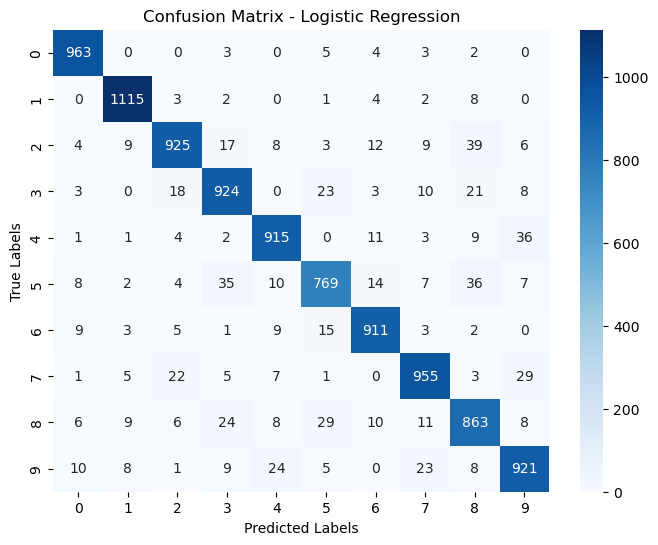

In [13]:
print(f"Best Logistic Regression Accuracy: {best_logistic_accuracy:.4f} with {best_logistic_params}")
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, best_y_pred_logistic))
plot_confusion_matrix(y_test, best_y_pred_logistic, "Logistic Regression")

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
random_forest_params = [
    {"n_estimators": 5, "max_depth": None},
    {"n_estimators": 7, "max_depth": 20},
    {"n_estimators": 10, "max_depth": 30}
]

In [16]:
best_rf_model = None
best_rf_accuracy = 0
best_rf_params = None

In [17]:
for params in random_forest_params:
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_rf_accuracy:
        best_rf_accuracy = accuracy
        best_rf_params = params
        best_rf_model = rf
        best_y_pred_rf = y_pred

Testing {'n_estimators': 5, 'max_depth': None}... Accuracy: 0.9244
Testing {'n_estimators': 7, 'max_depth': 20}... Accuracy: 0.9387
Testing {'n_estimators': 10, 'max_depth': 30}... Accuracy: 0.9520


Best Random Forest Accuracy: 0.9520 with {'n_estimators': 10, 'max_depth': 30}

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.96      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.93      0.94       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.95      1028
           8       0.95      0.92      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



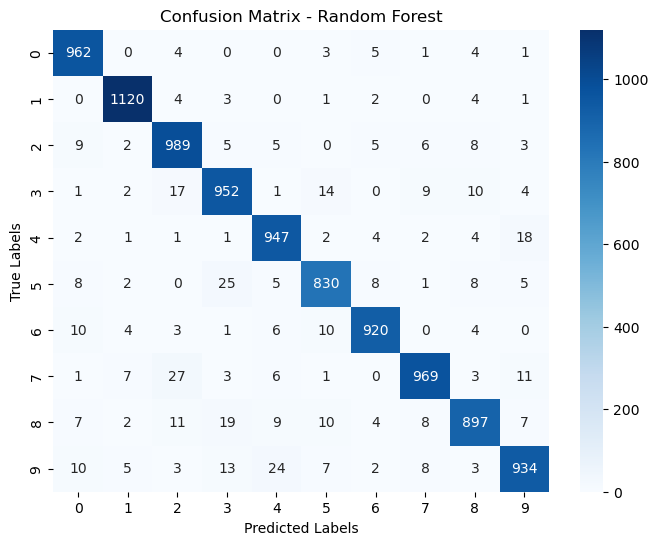

In [18]:
print(f"Best Random Forest Accuracy: {best_rf_accuracy:.4f} with {best_rf_params}")
print("\nClassification Report - Random Forest:\n", classification_report(y_test, best_y_pred_rf))
plot_confusion_matrix(y_test, best_y_pred_rf, "Random Forest")

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_params = [{"n_neighbors": n} for n in [1, 3, 5]]

In [21]:
best_knn_model = None
best_knn_accuracy = 0
best_knn_params = None

In [22]:
for params in knn_params:
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_knn_accuracy:
        best_knn_accuracy = accuracy
        best_knn_params = params
        best_knn_model = knn
        best_y_pred_knn = y_pred

Testing {'n_neighbors': 1}... Accuracy: 0.9691
Testing {'n_neighbors': 3}... Accuracy: 0.9705
Testing {'n_neighbors': 5}... Accuracy: 0.9688


Best KNN Accuracy: 0.9705 with {'n_neighbors': 3}

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



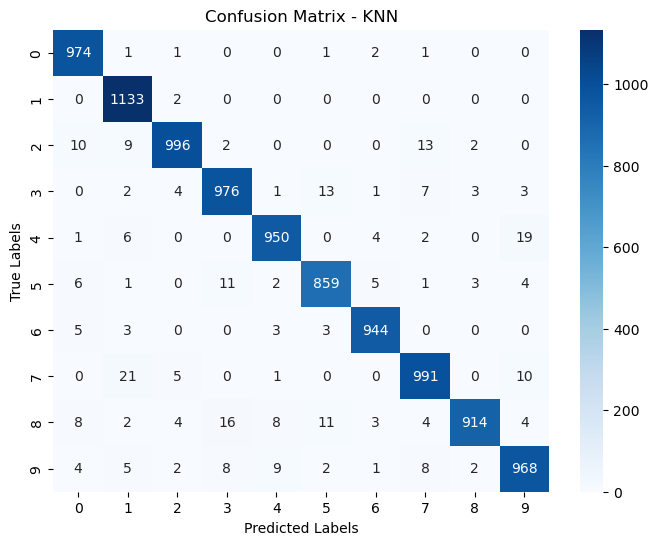

In [23]:
print(f"Best KNN Accuracy: {best_knn_accuracy:.4f} with {best_knn_params}")
print("\nClassification Report - KNN:\n", classification_report(y_test, best_y_pred_knn))
plot_confusion_matrix(y_test, best_y_pred_knn, "KNN")

In [24]:
# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [best_logistic_accuracy, best_rf_accuracy, best_knn_accuracy],
    'Precision': [
        precision_score(y_test, best_y_pred_logistic, average='weighted'),
        precision_score(y_test, best_y_pred_rf, average='weighted'),
        precision_score(y_test, best_y_pred_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, best_y_pred_logistic, average='weighted'),
        recall_score(y_test, best_y_pred_rf, average='weighted'),
        recall_score(y_test, best_y_pred_knn, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, best_y_pred_logistic, average='weighted'),
        f1_score(y_test, best_y_pred_rf, average='weighted'),
        f1_score(y_test, best_y_pred_knn, average='weighted')
    ]
})

# Display the comparison table
print("Model Comparison:")
print(comparison)

Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9261   0.926019  0.9261  0.925936
1        Random Forest    0.9520   0.952083  0.9520  0.951931
2  K-Nearest Neighbors    0.9705   0.970688  0.9705  0.970452


Conclusion:

The Random Forest Classifier generally performs well on the MNIST dataset due to its ability to handle complex patterns and interactions between pixels.
Logistic Regression may perform decently, but it often struggles with complex image data compared to tree-based methods.
K-Nearest Neighbors (KNN) can perform reasonably well but tends to be computationally expensive with large datasets